In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.utils import to_categorical   #for the categorical data

In [3]:
print(keras.__version__)

3.10.0


In [4]:
#import the dataset #x: Images and Y: labels of the images
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


9


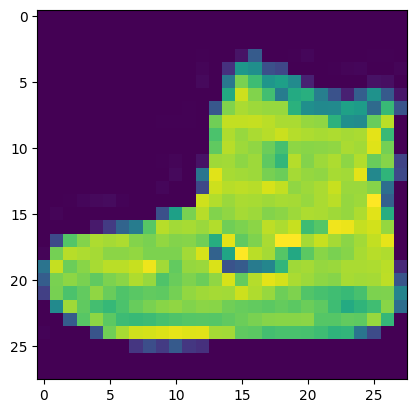

In [5]:
plt.imshow(train_X[0])
print(train_Y[0])

In [6]:
print(train_X.shape,train_Y.shape)

(60000, 28, 28) (60000,)


In [7]:
print(test_X.shape, test_Y.shape)

(10000, 28, 28) (10000,)


In [8]:
classes=np.unique(train_Y)
nClasses=len(classes)
print(classes)
print(nClasses)

[0 1 2 3 4 5 6 7 8 9]
10


In [9]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)

In [10]:
print(train_X.shape,train_Y.shape)
print(test_X.shape, test_Y.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [11]:
#converting the values of the pixels from 0-1
#type-conversion
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255
test_X=test_X/255

In [12]:
train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)

In [13]:
train_Y[0]

np.uint8(9)

In [14]:
train_Y_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [15]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)

In [16]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [17]:
batch_size=64
epochs=20
num_classes=10

In [18]:
model=tf.keras.Sequential()

In [19]:
#1st hidden layer
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [20]:
#2nd hidden layer
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [21]:
#3rd hidden layer
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [22]:
model.add(tf.keras.layers.Flatten())

In [23]:
model.add(tf.keras.layers.Dense(128,activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#output final layer

In [24]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [25]:
48000/64

750.0

In [26]:
model_train=model.fit(train_X,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_X,valid_label))


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7466 - loss: 0.6804 - val_accuracy: 0.8761 - val_loss: 0.3517
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.8930 - loss: 0.2937 - val_accuracy: 0.8953 - val_loss: 0.2942
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.9101 - loss: 0.2471 - val_accuracy: 0.9071 - val_loss: 0.2556
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.9224 - loss: 0.2117 - val_accuracy: 0.9049 - val_loss: 0.2649
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.9320 - loss: 0.1858 - val_accuracy: 0.9169 - val_loss: 0.2300
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9372 - loss: 0.1675 - val_accuracy: 0.9231 - val_loss: 0.2262
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 76ms/step - accuracy: 0.9488 - loss: 0.1369 - val_accuracy: 0.9204 - val_loss: 0.2351
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.9552 - loss: 0.1217 - 

In [27]:
testing_evaluation=model.evaluate(test_X,test_Y_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9143 - loss: 0.4388


In [28]:
testing_evaluation  #loss,accuracy

[0.43976840376853943, 0.9147999882698059]

In [29]:
model_train.history

{'accuracy': [0.8276041746139526,
  0.8953333497047424,
  0.911145806312561,
  0.9223333597183228,
  0.9306874871253967,
  0.9383333325386047,
  0.9467708468437195,
  0.9537291526794434,
  0.960645854473114,
  0.9671458601951599,
  0.9709374904632568,
  0.9746666550636292,
  0.9792916774749756,
  0.9808541536331177,
  0.9837083220481873,
  0.9867916703224182,
  0.9862708449363708,
  0.9854999780654907,
  0.9887708425521851,
  0.988937497138977],
 'loss': [0.46858450770378113,
  0.28880342841148376,
  0.24308070540428162,
  0.2118409276008606,
  0.18688258528709412,
  0.16398586332798004,
  0.1411721557378769,
  0.1238279789686203,
  0.10511264950037003,
  0.08858750760555267,
  0.07692229002714157,
  0.06682026386260986,
  0.05593448504805565,
  0.05123244225978851,
  0.04373522102832794,
  0.03550092503428459,
  0.037304457277059555,
  0.03923102468252182,
  0.03013838641345501,
  0.030964454635977745],
 'val_accuracy': [0.8760833144187927,
  0.8953333497047424,
  0.9070833325386047,


In [30]:
accuracy=model_train.history['accuracy']
val_accuracy=model_train.history['val_accuracy']
loss=model_train.history['loss']
val_loss=model_train.history['val_loss']
epochs=range(len(accuracy))

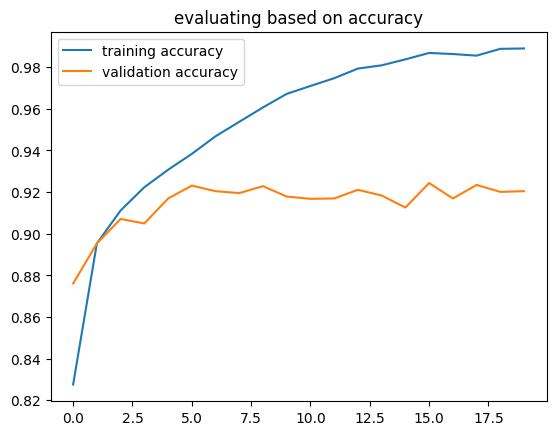

In [31]:
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.title('evaluating based on accuracy')
plt.legend()
plt.show()

In [32]:
regmodel=tf.keras.Sequential()
#1st hidden layer
regmodel.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.25))
#2nd hidden layer
regmodel.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.25))
#3rd hidden layer
regmodel.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.40))
regmodel.add(tf.keras.layers.Flatten())
regmodel.add(tf.keras.layers.Dense(128,activation='linear'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.Dropout(0.3))
regmodel.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#output final layer

In [33]:
regmodel.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [34]:
reg_model_train=regmodel.fit(train_X,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6678 - loss: 0.8875 - val_accuracy: 0.8688 - val_loss: 0.3634
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.8556 - loss: 0.3945 - val_accuracy: 0.8818 - val_loss: 0.3190
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.8712 - loss: 0.3440 - val_accuracy: 0.8948 - val_loss: 0.2848
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.8836 - loss: 0.3068 - val_accuracy: 0.9013 - val_loss: 0.2665
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.8949 - loss: 0.2847 - val_accuracy: 0.9036 - val_loss: 0.2588
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.8986 - loss: 0.2707 - val_accuracy: 0.9060 - val_loss: 0.2508
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.9037 - loss: 0.2538 - val_accuracy: 0.9078 - val_loss: 0.2478
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 76ms/step - accuracy: 0.9066 - loss: 0.2499 - 